In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import random
import numpy as np

In [12]:
G=nx.erdos_renyi_graph(20,0.2, seed=45)

In [13]:
node_list=[]
for node in G.nodes():
    node_list.append(node)
startnode=node_list[random.randint(0,len(node_list)-1)]
for edge in G.edges(startnode):
    edge_list=[]
    edge_list.append(edge[1])
    G.add_edge(i, edge_list[random.randint(0,len(edge_list)-1)])
    G.add_edge(i, edge_list[random.randint(0,len(edge_list)-1)])
    G.add_edge(i, edge_list[random.randint(0,len(edge_list)-1)])

4

In [22]:
for edge in G.edges(5):
    print(edge[1])

0
1
2
7
8
11


In [32]:
G.nodes(3)

NodeDataView({0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: None, 18: None, 19: None}, data=3)

In [33]:
2*len(G.edges)/len(G.nodes)

0.9

In [34]:
def BA_model(G):
    random.seed(5)
    clustering=[]
    num_nodes=[]
    for i in range(20, 1000):
        weight_list=[]
        for node,degree in G.degree():
            weight_list=weight_list+[node for x in range(degree)]
        np.random.shuffle(weight_list)
        #print(len(weight_list))
        G.add_edge(i,   weight_list[random.randint(1,len(weight_list)-1)])
        np.random.shuffle(weight_list)
        G.add_edge(i, weight_list[random.randint(1,len(weight_list)-1)])
        np.random.shuffle(weight_list)
        G.add_edge(i, weight_list[random.randint(1,len(weight_list)-1)])
        if i%10==0:
            num_nodes.append(i)
            clustering.append(nx.average_clustering(G))

In [35]:
plt.figure()
plt.scatter(num_nodes, clustering)
plt.yscale("log")
plt.xscale("log")

NameError: name 'num_nodes' is not defined

<Figure size 432x288 with 0 Axes>

In [36]:
def vizual(G):
    pos = nx.kamada_kawai_layout(G)
    plt.figure(figsize=(12,12))

    sizes = [ 10*G.degree[node]+5 for node in G.nodes]

    #prlist = [ns_pr[node] for node in cnsG.nodes]

    nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color="r", edgecolors='#ffffff')

    nx.draw_networkx_edges(G, pos, edge_color='#00000088')

    # draw labels
    #labels = {node:cnsG.nodes[node]['name'] for node in prtop10}
    #nx.draw_networkx_labels(cnsG, ns_pos, labels=labels, font_size=12)

    plt.axis('off');

In [24]:
def link_selection(G):
    random.seed(42)
    num_nodes=[]
    clustering=[]
    for i in range(20,1000):
        edges=[]
        for edge in G.edges():
            edges.append(edge)
        node=edges[random.randint(0,len(edges)-1)][random.randint(0,1)]
        G.add_edge(i, node)
        node=edges[random.randint(0,len(edges)-1)][random.randint(0,1)]
        G.add_edge(i, node)
        node=edges[random.randint(0,len(edges)-1)][random.randint(0,1)]
        G.add_edge(i, node)
        if i%10==0:
            num_nodes.append(i)
            clustering.append(nx.average_clustering(G)) 
    return G

In [25]:
G=nx.erdos_renyi_graph(20,0.05, seed=45)

In [26]:
link_selection(G)

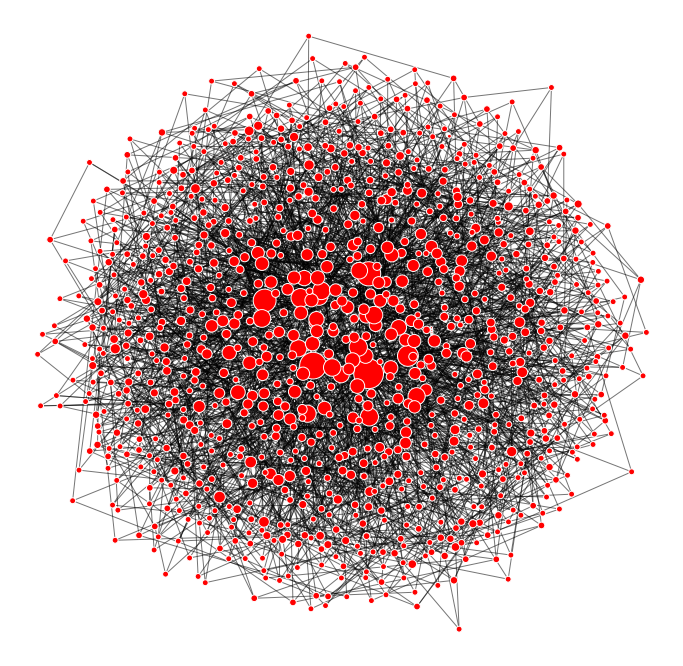

In [27]:
vizual(G)

In [28]:
            
def k_distrib(graph, fit_line=False, expct_lo=1, expct_hi=10, expct_const=1):
    
    plt.close()
    num_nodes = graph.number_of_nodes()
    max_degree = 0
    
    # Megkeressük a legmagasabb fokszámot, ami alapján meghatározzuk az x-tengelyt
    for n in graph.nodes():
        if graph.degree(n) > max_degree:
            max_degree = graph.degree(n)
    
    # X és Y tengely értékei
    x = []
    y_tmp = []
    
    # Végigiterálok a legnagyobb fokszám terjedelmében és meghatározom az adott fokszámok arányait a csomópontok alapján
    for i in range(max_degree + 1):
        x.append(i)
        y_tmp.append(0)
        for n in graph.nodes():
            if graph.degree(n) == i:
                y_tmp[i] += 1
        y = [i / num_nodes for i in y_tmp] 
    
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Fokszám eloszlás (log-log scale)')
    plt.ylabel('log(P(k))')
    plt.xlabel('log(k)')
    plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 4, color = 'purple', alpha = 1)
        
    if fit_line:
        w = [a for a in range(expct_lo,expct_hi)]
        z = []
        for i in w:
            x = (i**-3) * expct_const # Elméleti egyenes -3 meredekséggel és tetszőleges konstanssal
            z.append(x)
        plt.plot(w, z, 'k-', color='black')

    plt.show()

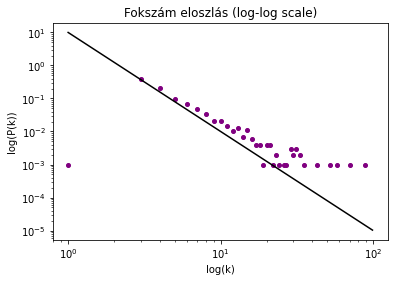

In [29]:
k_distrib(G, fit_line=True, expct_lo=1, expct_hi=100, expct_const=10)